<h2 align='center'>  Clasificador Naive Bayes </h2> 

## Teorema de Bayes

La fórmula del Teorema de Bayes es la siguiente:

$$P(H/E) = \frac{P(E/H)P(H)}{P(E)}$$

donde:

* $P(H|E)$ es la probabilidad de la hipótesis $H$ dado el evento $E$, una probabilidad posterior.


* $P(E|H)$ es la probabilidad del evento $E$ dado que la hipótesis $H$ es verdad.


* $P(H)$ es la probabilidad de la hipótesis $H$ siendo cierto (independientemente de cualquier evento relacionado), o probabilidad previa de $H$.


* $P(E)$ es la probabilidad de que ocurra el evento (independientemente de la hipótesis).

En caso de que se tenga una sola característica, el clasificador Naive Bayes calcula la probabilidad de un evento en los siguientes pasos:

**Paso 1:** Calcular la probabilidad previa para las etiquetas de clase dadas.

**Paso 2:** Determinar la probabilidad de cada atributo para cada clase.

**Paso 3:** Poner estos valores en el teorema de Bayes y calcular la probabilidad posterior.

**Paso 4:** Ver qué clase tiene una probabilidad más alta, dado que la variable de entrada pertenece a la clase de probabilidad más alta.

<h2> Mapa </h2>
<ul>
    <li>1-. Formular la pregunta y determinar los datos requeridos</li>
    <li>2-. Adquirir los datos en un formato accesible</li>
    <li>3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario</li>
    <li>4-. Preparar los datos para el modelo de aprendizaje automático</li>
    <li>5-. Entrenar el modelo en los datos de entrenamiento</li>
    <li>6-. Predicciones sobre los datos de prueba</li>
    <li>7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento</li>
</ul>

In [1]:
# Libreria para la manipulación de los datos
import pandas as pd
import numpy as np

# Leer el dataframe
dataframe = pd.read_excel('../bdd/dataframe.xlsx')
dataframe.head(5)

,CLAVE,COMUNA,TELEFONOS,FICHA CLINICA,CTA CTE,EDAD,PESO,TALLA,HTA,DIABETES,...,logVEGF,logPlGF,logPCR,PCR/VEGF ratio,PCR/PLGF ratio,IL-6 (pg/ml),IL-6 corregida,log IL-6,IL-6/VEGF,IL-6/PlGF
0,1,san carlos,NaN,2012418042,11998898,53.0,NaN,NaN,NaN,NaN,...,1.768165,0.973961,0.170262,0.096293,0.174814,18.586835,0.156953,-0.804231,-0.454840,-0.825732
1,2,coihueco,41723921-74822219,2000149601,12002852,54.0,88.0,165.0,si,si,...,2.143150,1.749737,0.222716,0.103920,0.127286,1.263441,0.012818,-1.892186,-0.882899,-1.081411
2,3,chillan,71818219-50323843,98085992,12003092,78.0,NaN,NaN,si,si,...,1.560877,1.213371,1.083144,0.693933,0.892673,49.091862,0.436365,-0.360150,-0.230736,-0.296817
3,4,coihueco,77107584-93406930,9772094,11995391,87.0,52.5,NaN,si,si,...,2.254849,1.660278,0.060698,0.026919,0.036559,96.544126,0.934859,-0.029254,-0.012974,-0.017620
4,5,yungay,99240760-77884029,98095110,12014450,69.0,94.0,NaN,si,si,...,2.015323,1.741045,0.107210,0.053197,0.061578,43.309864,0.379102,-0.421244,-0.209021,-0.241949


In [2]:
print('Existen {} pacientes con {} variables.'.format(*dataframe.shape))

Existen 44 pacientes con 85 variables.


# 3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario

En este item, la base de datos será rellenada.

In [3]:
# Tomaremos las variables más significativas para la investigación
columnasMuestra = ['HTA', 'DIABETES', 'EDAD','TRIGLICERIDOS', 'PESO', 'TALLA', 'FC', 'GLUCOSA', 'Hb A/C  %', 'COL. TOTAL', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'VCM', 'HCM', 'VHS', 'PLAQUETAS', 'INR', 'CONTEO G.B.', 'P.C.R', 'Nitrogeno Ureico', 'Uremia', 'Creatinina', 'TTPA', 'TP', 'NA', 'K', 'CL', 'Fosfatasa Alcalina', 'Gamma glutamil', 'Transaminasa piruvica', 'Trans oxal', 'GLASGOW AL INICO ACV', 'NIHSS_INICO_ACV', 'RANKIN INICIO ACV', 'NIHSS alta ACV', 'RANKIN alta ACV', 'NIHSS 6M', 'RANKIN 6M']
dataset = dataframe[[*columnasMuestra]]

# Para los datos fallecidos y NaN realizamos la impuntación y manejo de datos a través del promedio
dataset['NIHSS 6M'] = dataset['NIHSS 6M'].replace( ['fallecido'], 0)
dataset['RANKIN 6M'] = dataset['RANKIN 6M'].replace( ['no'], 0)

valores_por_defecto = {'HTA': "DESCONOCIDO",
                       'DIABETES' : "DESCONOCIDO",
                       'EDAD':dataset["EDAD"].mean(),
                       'TRIGLICERIDOS':dataset["TRIGLICERIDOS"].mean(), 
                       'PESO':dataset["PESO"].mean(),
                       'TALLA':dataset["TALLA"].mean(),
                       'FC':dataset["FC"].mean(),
                       'GLUCOSA':dataset["GLUCOSA"].mean(),
                       'Hb A/C  %':dataset["Hb A/C  %"].mean(), 
                       'COL. TOTAL':dataset["COL. TOTAL"].mean(), 
                       'TRIGLICERIDOS':dataset["TRIGLICERIDOS"].mean(),
                       'LDL':dataset["LDL"].mean(), 
                       'HDL':dataset["HDL"].mean(),
                       'HCTO':dataset["HCTO"].mean(), 
                       'HB':dataset["HB"].mean(),
                       'VCM':dataset["VCM"].mean(),
                       'HCM':dataset["HCM"].mean(), 
                       'VHS':dataset["VHS"].mean(),
                       'PLAQUETAS':dataset["PLAQUETAS"].mean(),
                       'INR':dataset["INR"].mean(),
                       'CONTEO G.B.':dataset["CONTEO G.B."].mean(),
                       'P.C.R':dataset["P.C.R"].mean(),
                       'Nitrogeno Ureico':dataset["Nitrogeno Ureico"].mean(),
                       'Uremia':dataset["Uremia"].mean(),
                       'Creatinina':dataset["Creatinina"].mean(), 
                       'TTPA':dataset["TTPA"].mean(),
                       'TP':dataset["TP"].mean(), 
                       'NA':dataset["NA"].mean(), 
                       'K':dataset["K"].mean(),
                       'CL':dataset["CL"].mean(),
                       'Fosfatasa Alcalina':dataset["Fosfatasa Alcalina"].mean(),
                       'Gamma glutamil':dataset["Gamma glutamil"].mean(), 
                       'Transaminasa piruvica':dataset["Transaminasa piruvica"].mean(),
                       'Trans oxal':dataset["Trans oxal"].mean(), 
                       'GLASGOW AL INICO ACV':dataset["GLASGOW AL INICO ACV"].mean(),
                       'NIHSS_INICO_ACV':dataset["NIHSS_INICO_ACV"].mean().round(), 
                       'RANKIN INICIO ACV':dataset["RANKIN INICIO ACV"].mean(), 
                       'NIHSS alta ACV':dataset["NIHSS alta ACV"].mean(), 
                       'RANKIN alta ACV':dataset["RANKIN alta ACV"].mean(), 
                       'NIHSS 6M':dataset["NIHSS 6M"].mean(), 
                       'RANKIN 6M':dataset["RANKIN 6M"].mean()
                      }

dataset = dataset.fillna(value=valores_por_defecto)
dataset.head(5)

C:\Users\Abraham\AppData\Local\Temp\ipykernel_1878360\2763670976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['NIHSS 6M'] = dataset['NIHSS 6M'].replace( ['fallecido'], 0)
C:\Users\Abraham\AppData\Local\Temp\ipykernel_1878360\2763670976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RANKIN 6M'] = dataset['RANKIN 6M'].replace( ['no'], 0)


,HTA,DIABETES,EDAD,TRIGLICERIDOS,PESO,TALLA,FC,GLUCOSA,Hb A/C %,COL. TOTAL,...,Gamma glutamil,Transaminasa piruvica,Trans oxal,GLASGOW AL INICO ACV,NIHSS_INICO_ACV,RANKIN INICIO ACV,NIHSS alta ACV,RANKIN alta ACV,NIHSS 6M,RANKIN 6M
0,DESCONOCIDO,DESCONOCIDO,53.0,130.0,78.25,164.25,78.416667,137.090000,5.9,268.0,...,41.660000,20.39000,25.51,11.0,14.0,5.0,42.0,6.0,0.000000,6.000000
1,si,si,54.0,130.0,88.00,165.00,56.000000,136.732703,6.5,187.0,...,39.527317,27.22425,27.34,15.0,6.0,5.0,0.0,2.0,0.000000,2.000000
2,si,si,78.0,97.0,78.25,164.25,91.000000,359.420000,13.8,159.0,...,130.390000,49.57000,23.40,15.0,5.0,3.0,2.0,1.0,2.052632,2.526316
3,si,si,87.0,133.0,52.50,164.25,59.000000,186.200000,5.9,193.0,...,33.950000,15.59000,22.93,15.0,1.0,4.0,0.0,2.0,0.000000,2.000000
4,si,si,69.0,137.0,94.00,164.25,104.000000,170.000000,16.7,184.0,...,39.527317,27.22425,27.34,15.0,3.0,4.0,2.0,1.0,0.000000,1.000000


### Inspección numérica y visual de datos

In [4]:
round(dataset.describe(), 2)

,EDAD,TRIGLICERIDOS,PESO,TALLA,FC,GLUCOSA,Hb A/C %,COL. TOTAL,TRIGLICERIDOS,LDL,...,Gamma glutamil,Transaminasa piruvica,Trans oxal,GLASGOW AL INICO ACV,NIHSS_INICO_ACV,RANKIN INICIO ACV,NIHSS alta ACV,RANKIN alta ACV,NIHSS 6M,RANKIN 6M
count,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,...,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00
mean,71.69,122.97,78.25,164.25,78.42,136.73,8.98,162.46,122.97,95.46,...,39.53,27.22,27.34,13.97,5.66,3.64,5.69,2.37,2.05,2.53
std,12.00,44.34,9.13,1.30,16.32,50.51,3.37,49.86,44.34,45.11,...,23.75,18.70,16.64,1.45,4.31,1.38,9.75,1.78,4.38,2.05
min,38.00,57.00,52.50,158.00,40.00,82.61,4.80,85.00,57.00,18.00,...,11.61,10.27,10.52,8.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,64.25,91.50,78.25,164.25,67.75,101.17,5.90,120.50,91.50,63.50,...,24.94,15.90,19.32,13.97,3.00,3.00,0.00,1.00,0.00,1.00
50%,71.85,122.97,78.25,164.25,78.42,130.59,8.98,162.46,122.97,95.46,...,33.11,21.88,23.60,13.98,5.00,4.00,2.00,2.00,0.00,2.00
75%,80.50,137.00,78.25,164.25,90.00,161.17,11.00,184.75,137.00,114.25,...,42.33,29.39,27.45,15.00,6.00,5.00,5.69,4.00,2.05,4.00
max,90.00,232.00,110.00,170.00,126.00,359.42,16.70,342.00,232.00,254.00,...,130.39,105.36,104.42,15.00,21.00,5.00,42.00,6.00,25.00,6.00


### Número de clase

In [5]:
print(dataframe.groupby('NIHSS_INICO_ACV').size())

NIHSS_INICO_ACV
0.0     1
1.0     3
2.0     6
3.0     3
4.0     7
5.0     4
6.0     4
7.0     4
10.0    1
13.0    1
14.0    1
15.0    1
16.0    1
21.0    1
dtype: int64


In [6]:
# Obtener la columna a comparar
clase = dataset['NIHSS_INICO_ACV']

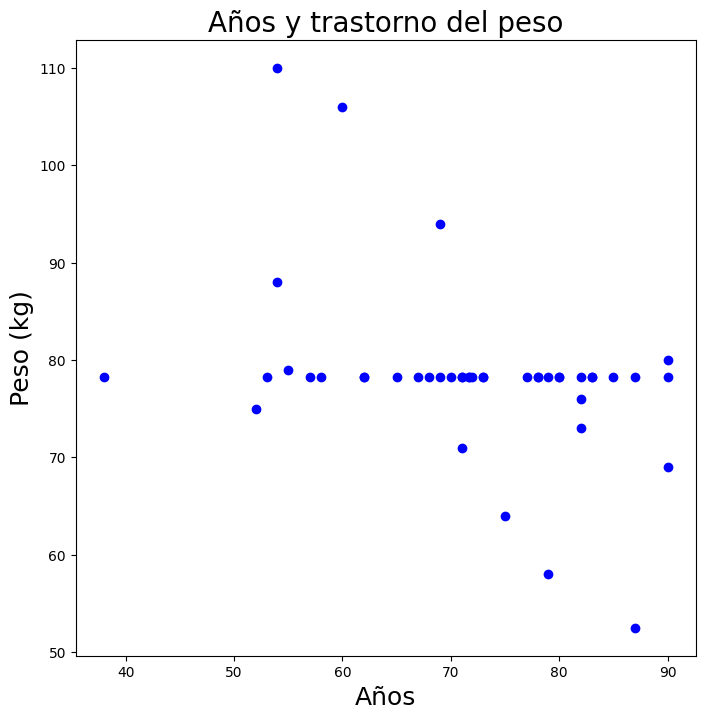

In [10]:
# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(8, 8))

plt.plot(dataset['EDAD'], dataset['PESO'], 'bo');
plt.xlabel('Años', size = 18); plt.ylabel('Peso (kg)', size = 18); 
plt.title('Años y trastorno del peso', size = 20);

# 4-. Preparar los datos para el modelo de aprendizaje automático
## Preparación de datos

Los pasos exactos para la preparación de los datos dependerán del modelo utilizado y de los datos recopilados, pero se requerirá cierta cantidad de manipulación de datos para cualquier aplicación de aprendizaje automático.

##### Codificación One-Hot

El primer paso para nosotros se conoce como codificación one-hotde los datos Este proceso toma variables categóricas, como Diabetes, y las convierte en una representación numérica sin un orden arbitrario

In [7]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)

dataset.head(5)

# Lista de características para uso posterior
features = dataset.drop('NIHSS_INICO_ACV', axis = 1)
feature_list = list(features.columns)

# 5-. Entrenar el modelo en los datos de entrenamiento

In [8]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = dataset.drop('NIHSS_INICO_ACV', axis = 1)

# y es nuestra variable dependiente
y = dataset['NIHSS_INICO_ACV']

# Uso de Skicit-learn para dividir datos en conjuntos de entrenamiento y prueba 
# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Creamos el modelo y entrenamos

In [14]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
modelo.fit(X_train, y_train)

GaussianNB()

# 6-. Predicciones sobre los datos de prueba
Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [17]:
# Predicción Entrenamiento 
prediccionEntreno = modelo.predict(X_train)

# Predicción Tests
prediccionTests = modelo.predict(X_test)

### Generamos métricas para evaluar el modelo

## Fase de Entrenamiento

In [18]:
from sklearn import metrics

print("Entrenamiento - Accuracy :", metrics.accuracy_score(y_train, prediccionEntreno))

Entrenamiento - Accuracy : 0.9310344827586207


### Matriz de Confusión

En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

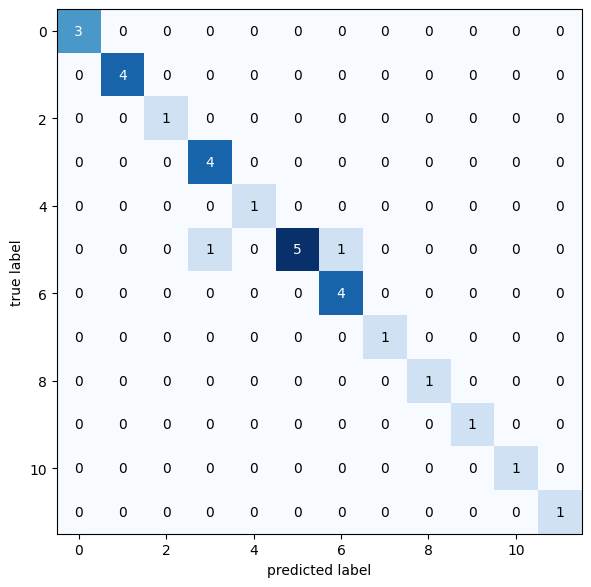

In [19]:
from matplotlib import pyplot as plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_train, prediccionEntreno)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plot.tight_layout()

In [20]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_train, prediccionEntreno))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00         1
         4.0       0.80      1.00      0.89         4
         5.0       1.00      1.00      1.00         1
         6.0       1.00      0.71      0.83         7
         7.0       0.80      1.00      0.89         4
        10.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1
        15.0       1.00      1.00      1.00         1
        16.0       1.00      1.00      1.00         1
        21.0       1.00      1.00      1.00         1

    accuracy                           0.93        29
   macro avg       0.97      0.98      0.97        29
weighted avg       0.94      0.93      0.93        29



# 7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento

## Fase de validación  (Usando datos de Test)

In [21]:
print("Promedio - Accuracy :", metrics.accuracy_score(y_test, prediccionTests))

Promedio - Accuracy : 0.2


### Matriz de Confusión

C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


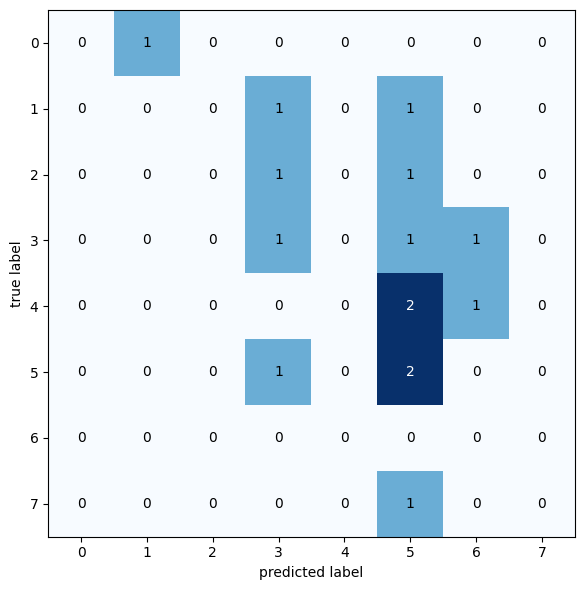

In [22]:
matriz = confusion_matrix(y_test, prediccionTests)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()